# ABEL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *

### Define the input beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 0e-6 # [m]
driver.emit_nx, driver.emit_ny = 20e-6, 20e-6 # [m rad]
driver.beta_x, driver.beta_y = 10e-3, 10e-3 # [m]
driver.num_particles = 500000
driver.symmetrize = True

# define witness bunch
witness = SourceBasic()
witness.charge = -0.5e-9 # [C]
witness.energy = 100e6 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 5e-6 # [m]
witness.z_offset = -135e-6 # [m]
witness.emit_nx, witness.emit_ny = 10e-6, 10e-6 # [m rad]
witness.beta_x, witness.beta_y = 10e-3, 10e-3 # [m]
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 10e-6, 0e-6 # [m]

# define rf linac
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = driver.energy-witness.energy
rf_accelerator.length = 1000 # [m]

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = witness.beta_x # [m]
bds.beta_y = witness.beta_y # [m]

# define overall linac
linac = ConventionalLinac()
linac.source = witness
linac.rf_accelerator = rf_accelerator
linac.bds = bds

### Define the experimental setup

initializing ocelot...


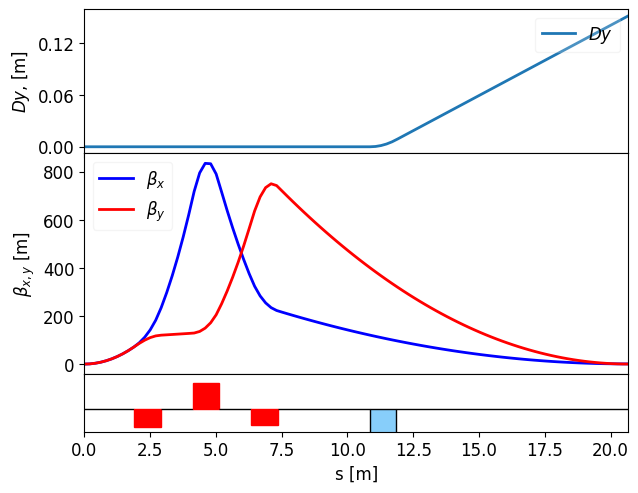

In [3]:
# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.length = 0.8 # [m]
stage.plasma_density = 4e22 # [m^-3]
stage.ion_motion = True
stage.ion_species = 'Ar'
stage.beam_ionization = False

# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.obj_plane = 0 # [m]
spectrometer.obj_plane_y = 0 # [m]
spectrometer.mag_x = -4
spectrometer.img_energy = 18e9 # [eV]
spectrometer.bend_angle = -0.03
spectrometer.plot_twiss()

# define experiment
experiment = ExperimentPWFA()
experiment.linac = linac
experiment.stage = stage
experiment.spectrometer = spectrometer

### Perform linac tracking

In [4]:
# perform experiment tracking
beam = experiment.run('experiment_example', num_shots=1, overwrite=True)

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 0.1 GeV, -0.50 nC, 1.0% rms, 10.0/9.9 µm-rad)
Tracking element 2 (RFAcceleratorBasic, stage 0, s = 1000.0 m, 10.0 GeV, -0.50 nC, 0.0% rms, 10.0/9.9 µm-rad)
Tracking element 3 (BeamDeliverySystemBasic, stage 0, s = 1000.0 m, 10.0 GeV, -0.50 nC, 0.0% rms, 10.0/9.9 µm-rad)
Tracking element 4 (StageQuasistatic2d, stage 1, s = 1000.8 m, 21.7 GeV, -0.50 nC, 1.8% rms, 11.7/11.1 µm-rad)
Tracking element 5 (SpectrometerFacetOcelot, stage 1, s = 1021.5 m, 21.7 GeV, -0.50 nC, 1.8% rms, 11.7/30654.0 µm-rad)


### Plot the wakefield

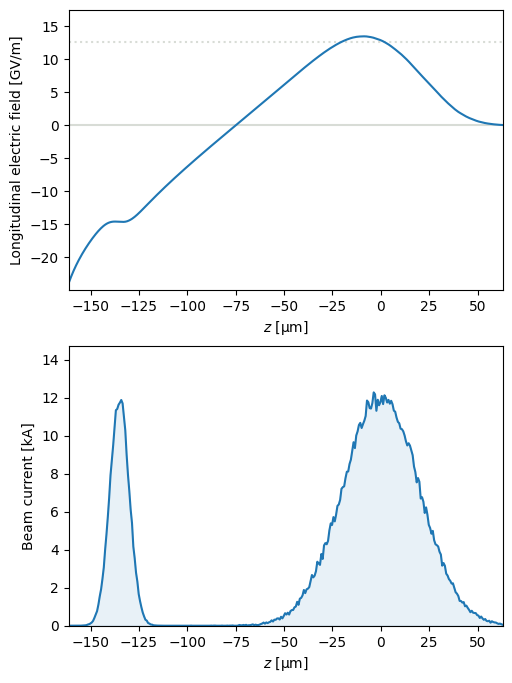

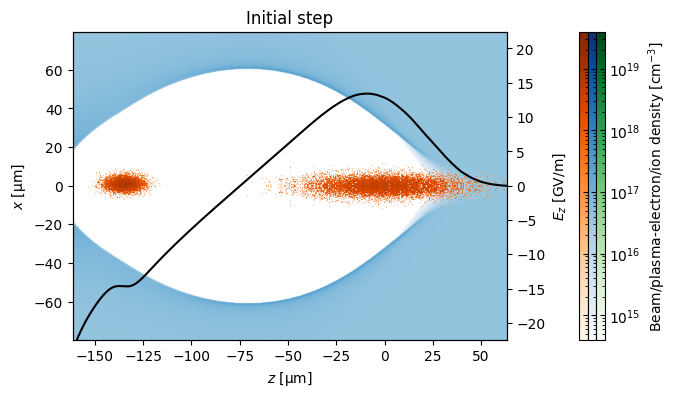

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()
experiment.stage.plot_wake()

### Plot the spectrometer screen

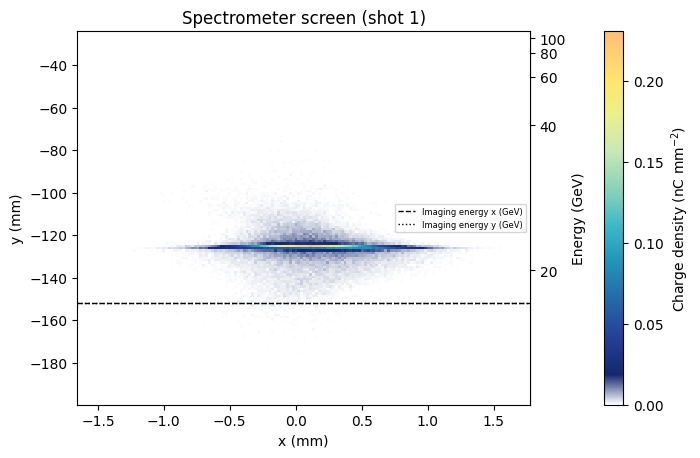

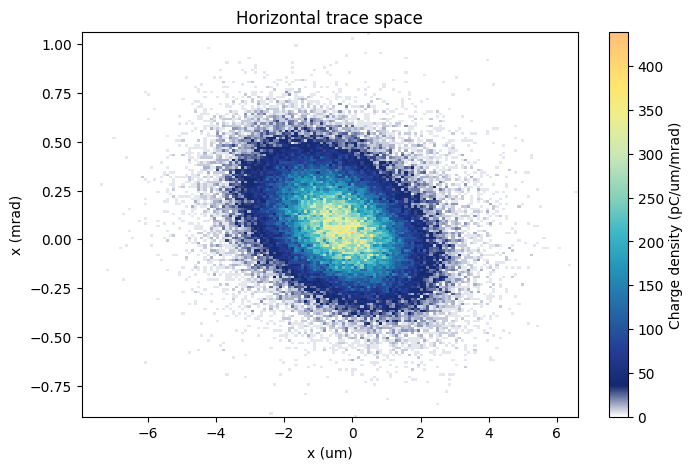

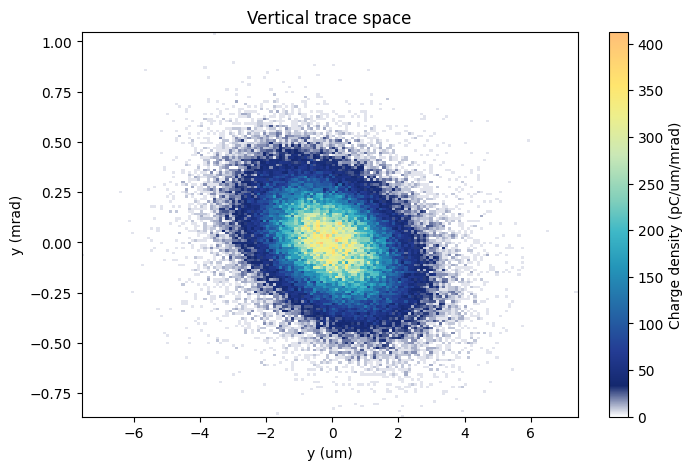

In [6]:
experiment.plot_spectrometer_screen()
experiment.get_beam(-2).plot_trace_space_x()
experiment.get_beam(-2).plot_trace_space_y()

### Plot longitudinal phase space

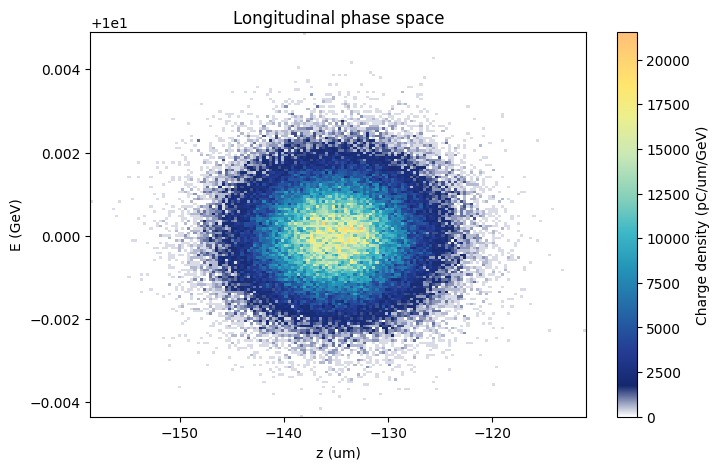

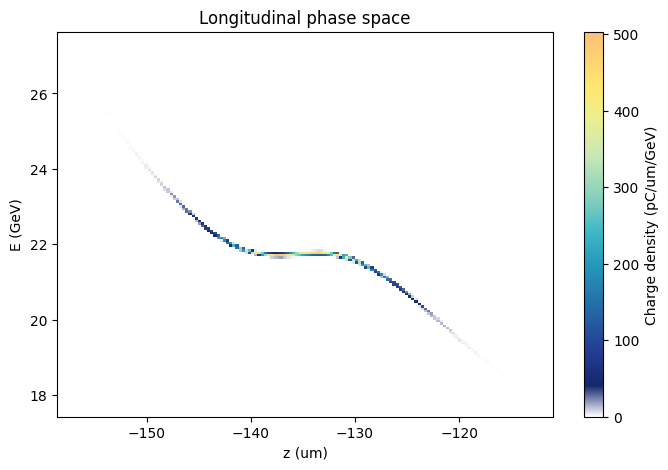

In [7]:
# plot the longitudinal phase space (before and after the PWFA)
experiment.get_beam(index=-3).plot_lps()
experiment.get_beam(index=-2).plot_lps()